<a href="https://colab.research.google.com/github/joshnajoyn517-bot/data-science-project/blob/main/Aadhar_enrolment_hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UIDAI Aadhaar Enrolment Analysis – Hackathon 2026

## Objective
The objective of this project is to analyze Aadhaar enrolment data
provided by UIDAI to identify state-wise and age-wise enrolment
patterns across India.

## Dataset
The dataset contains Aadhaar enrolment records with the following fields:
- Date of enrolment
- State and district
- Pincode
- Age-wise enrolments (0–5, 5–17, 18+)

## Tools Used
- Google Colab
- Python
- Pandas
- Matplotlib


In [ ]:
import zipfile
import os


In [ ]:
zip_path = '/content/api_data_aadhar_enrolment (4).zip'  # path to your uploaded ZIP
extract_path = '/content/aadhar_data'  # folder to extract files

# Create folder if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Extract the ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete. Files are in:", extract_path)


Extraction complete. Files are in: /content/aadhar_data


In [ ]:
for root, dirs, files in os.walk(extract_path):
    for file in files:
        print(os.path.join(root, file))


/content/aadhar_data/api_data_aadhar_enrolment/api_data_aadhar_enrolment_500000_1000000.csv
/content/aadhar_data/api_data_aadhar_enrolment/api_data_aadhar_enrolment_0_500000.csv
/content/aadhar_data/api_data_aadhar_enrolment/api_data_aadhar_enrolment_1000000_1006029.csv


In [ ]:
import pandas as pd

file_path = '/content/aadhar_data/api_data_aadhar_enrolment/api_data_aadhar_enrolment_0_500000.csv'  # corrected file path
df = pd.read_csv(file_path)
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   date            500000 non-null  object
 1   state           500000 non-null  object
 2   district        500000 non-null  object
 3   pincode         500000 non-null  int64 
 4   age_0_5         500000 non-null  int64 
 5   age_5_17        500000 non-null  int64 
 6   age_18_greater  500000 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 26.7+ MB


In [ ]:
df.isnull().sum()


,0
date,0
state,0
district,0
pincode,0
age_0_5,0
age_5_17,0
age_18_greater,0


In [ ]:
df['total_enrolments'] = (
    df['age_0_5'] +
    df['age_5_17'] +
    df['age_18_greater']
)

df.head()


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrolments
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37,109
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39,86
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,123
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15,106
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21,51


In [ ]:
state_summary = df.groupby('state')['total_enrolments'].sum().reset_index()
state_summary.sort_values(by='total_enrolments', ascending=False)


,state,total_enrolments
45,Uttar Pradesh,670426
6,Bihar,390901
27,Madhya Pradesh,277081
50,West Bengal,222260
28,Maharashtra,222030
39,Rajasthan,205699
16,Gujarat,193313
5,Assam,167163
23,Karnataka,121762
41,Tamil Nadu,105582


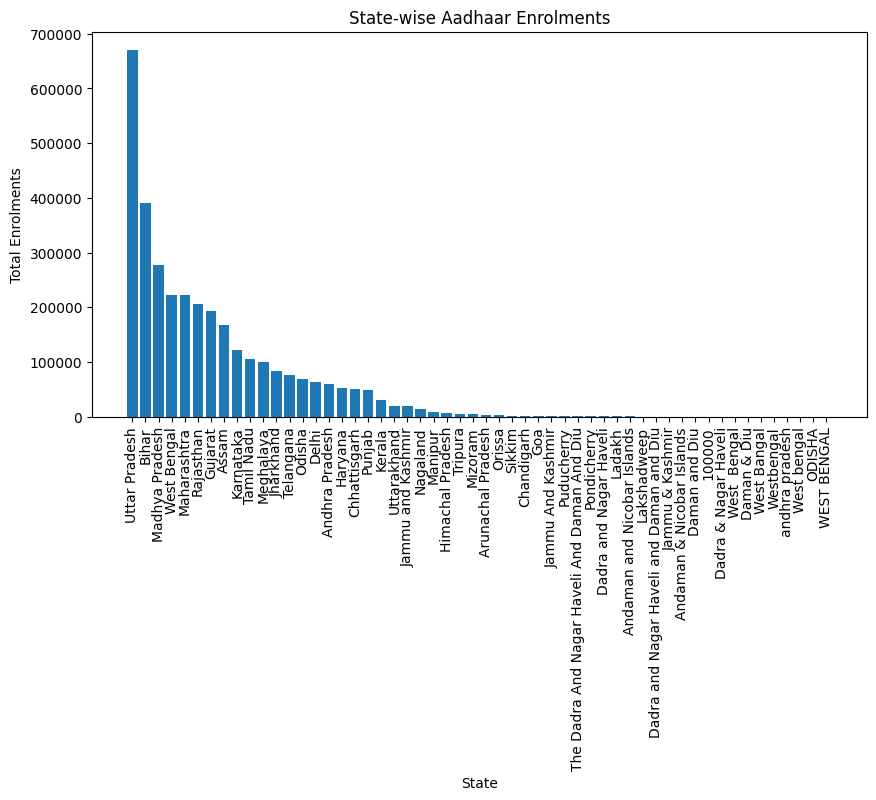

In [ ]:
import matplotlib.pyplot as plt

state_summary_sorted = state_summary.sort_values(
    by='total_enrolments', ascending=False
)

plt.figure(figsize=(10,5))
plt.bar(state_summary_sorted['state'], state_summary_sorted['total_enrolments'])
plt.xticks(rotation=90)
plt.title('State-wise Aadhaar Enrolments')
plt.xlabel('State')
plt.ylabel('Total Enrolments')
plt.show()


 State-wise Enrolment
States such as Karnataka and Uttar Pradesh show higher Aadhaar
enrolments, suggesting higher population density or greater
enrolment activity in these regions.


In [ ]:
age_summary = df[['age_0_5','age_5_17','age_18_greater']].sum()
age_summary


,0
age_0_5,2020406
age_5_17,1157841
age_18_greater,122779


<Axes: title={'center': 'Age Group Enrolments'}>

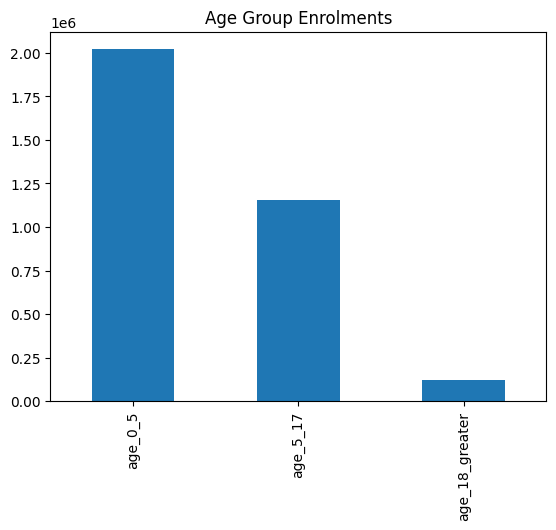

In [ ]:
age_summary.plot(kind='bar', title='Age Group Enrolments')


## Age-wise Enrolment Analysis

The bar chart shows that Aadhaar enrolments are highest in the
5–17 age group, followed by 0–5. Enrolments for the 18+ age group
are comparatively lower in the given dataset.

This indicates higher Aadhaar registration activity among
children and adolescents during the selected period.
